In [158]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
parkinsons_data = pd.read_csv('/content/parkinsons.csv')

In [161]:
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [162]:
parkinsons_data.shape

(195, 24)

In [163]:
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [164]:
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [165]:
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [166]:
parkinsons_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

1  --> Parkinson's Positive

0 --> Healthy


In [167]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [168]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [169]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [170]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [171]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


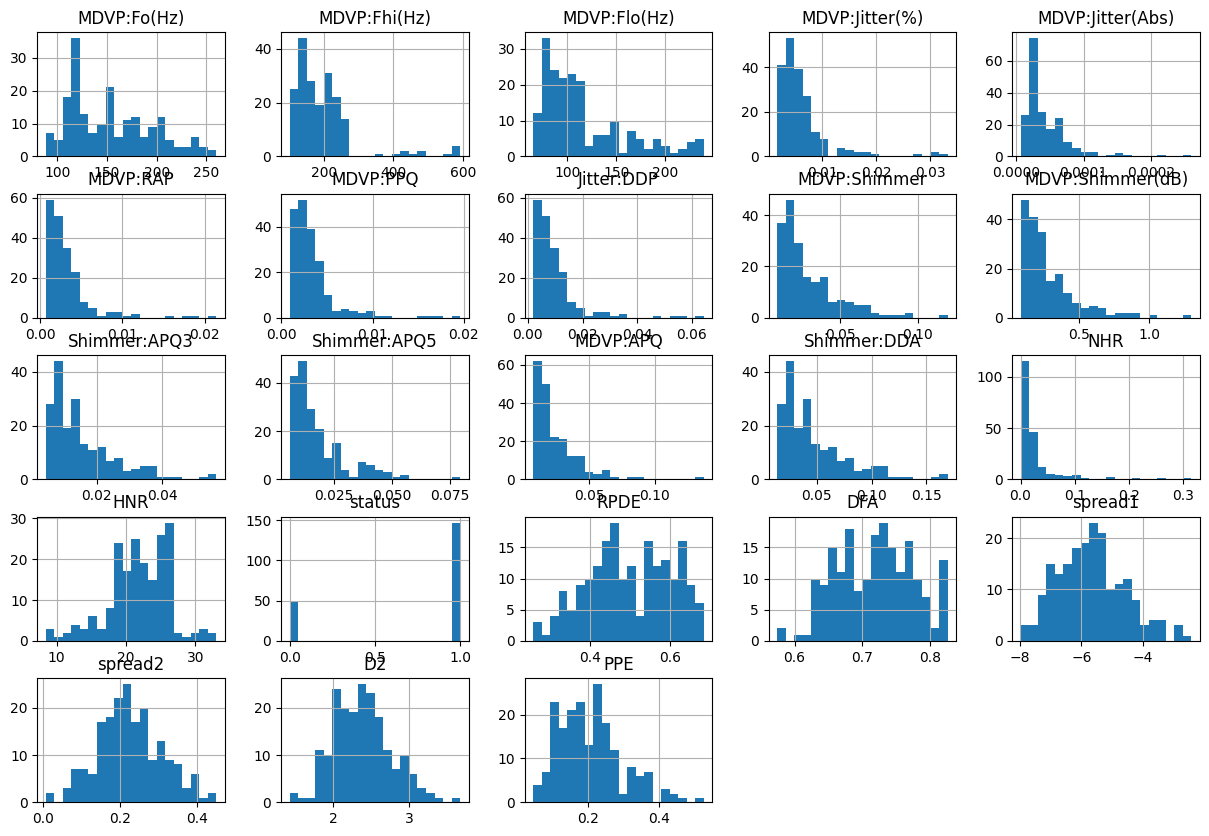

In [172]:
parkinsons_data.hist(bins=20, figsize=(15, 10))
plt.show()

In [173]:
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [174]:
Y_pred_lr = lr_model.predict(X_test)

In [175]:
lr_recall = recall_score(Y_test, Y_pred_lr)
lr_precision = precision_score(Y_test, Y_pred_lr)
lr_f2_score = fbeta_score(Y_test, Y_pred_lr, beta=2)
lr_accuracy = accuracy_score(Y_test, Y_pred_lr)

In [176]:
print("Logistic Regression Metrics:")
print(f"Recall: {lr_recall}")
print(f"Precision: {lr_precision}")
print(f"F2 Score: {lr_f2_score}")
print(f"Accuracy: {lr_accuracy}")

Logistic Regression Metrics:
Recall: 0.967741935483871
Precision: 0.8823529411764706
F2 Score: 0.949367088607595
Accuracy: 0.8717948717948718


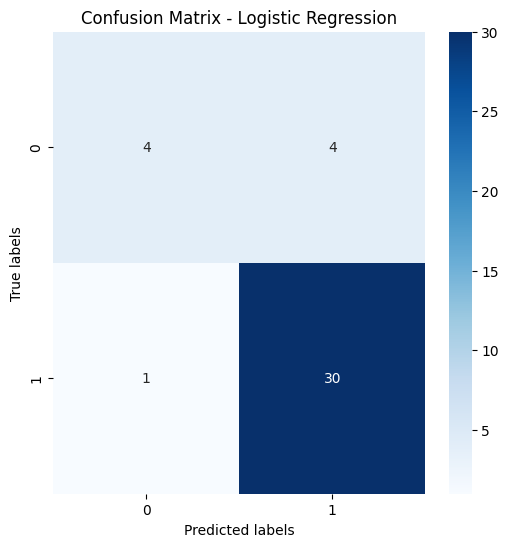

In [177]:
lr_conf_matrix = confusion_matrix(Y_test, Y_pred_lr)
plt.figure(figsize=(6, 6))
sns.heatmap(lr_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [178]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [179]:
Y_pred_dt = dt_model.predict(X_test)

In [180]:
dt_recall = recall_score(Y_test, Y_pred_dt)
dt_precision = precision_score(Y_test, Y_pred_dt)
dt_f2_score = fbeta_score(Y_test, Y_pred_dt, beta=2)
dt_accuracy = accuracy_score(Y_test, Y_pred_dt)

In [181]:
print("Decision Tree Metrics:")
print(f"Recall: {dt_recall}")
print(f"Precision: {dt_precision}")
print(f"F2 Score: {dt_f2_score}")
print(f"Accuracy: {dt_accuracy}")

Decision Tree Metrics:
Recall: 0.7096774193548387
Precision: 0.9565217391304348
F2 Score: 0.7482993197278911
Accuracy: 0.7435897435897436


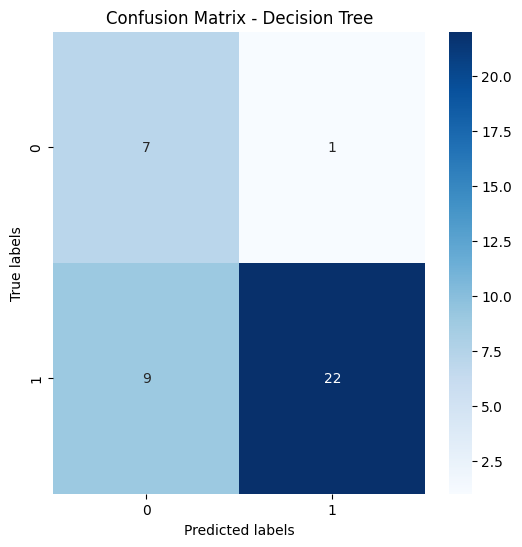

In [182]:
dt_conf_matrix = confusion_matrix(Y_test, Y_pred_dt)
plt.figure(figsize=(6, 6))
sns.heatmap(dt_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [183]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

In [184]:
Y_pred_rf = rf_model.predict(X_test)

In [185]:
rf_recall = recall_score(Y_test, Y_pred_rf)
rf_precision = precision_score(Y_test, Y_pred_rf)
rf_f2_score = fbeta_score(Y_test, Y_pred_rf, beta=2)
rf_accuracy = accuracy_score(Y_test, Y_pred_rf)

In [186]:
print("Random Forest Metrics:")
print(f"Recall: {rf_recall}")
print(f"Precision: {rf_precision}")
print(f"F2 Score: {rf_f2_score}")
print(f"Accuracy: {rf_accuracy}")

Random Forest Metrics:
Recall: 0.8709677419354839
Precision: 0.9
F2 Score: 0.8766233766233766
Accuracy: 0.8205128205128205


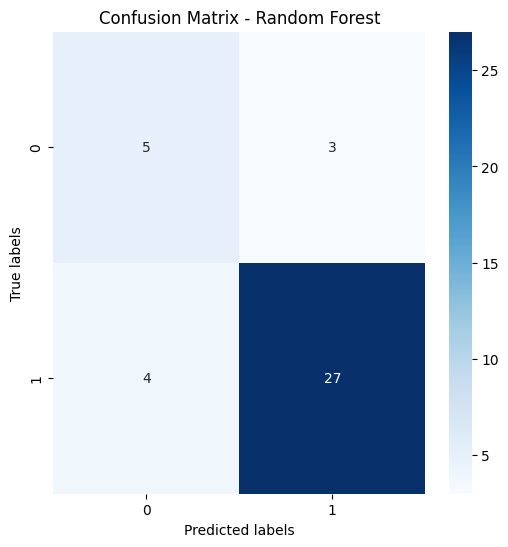

In [187]:
rf_conf_matrix = confusion_matrix(Y_test, Y_pred_rf)
plt.figure(figsize=(6, 6))
sns.heatmap(rf_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [188]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, Y_train)

GradientBoostingClassifier()

In [189]:
Y_pred_gb = gb_model.predict(X_test)

In [190]:
gb_recall = recall_score(Y_test, Y_pred_gb)
gb_precision = precision_score(Y_test, Y_pred_gb)
gb_f2_score = fbeta_score(Y_test, Y_pred_gb, beta=2)
gb_accuracy = accuracy_score(Y_test, Y_pred_gb)

In [191]:
print("Gradient Boosting Metrics:")
print(f"Recall: {gb_recall}")
print(f"Precision: {gb_precision}")
print(f"F2 Score: {gb_f2_score}")
print(f"Accuracy: {gb_accuracy}")

Gradient Boosting Metrics:
Recall: 0.8387096774193549
Precision: 0.9285714285714286
F2 Score: 0.8552631578947368
Accuracy: 0.8205128205128205


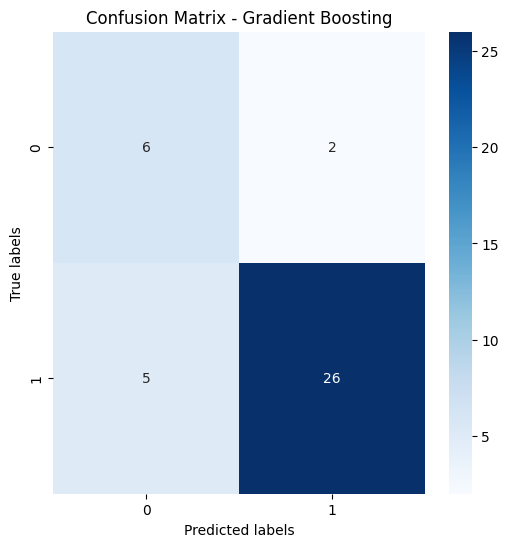

In [192]:
gb_conf_matrix = confusion_matrix(Y_test, Y_pred_gb)
plt.figure(figsize=(6, 6))
sns.heatmap(gb_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

In [193]:
svm_model = SVC()
svm_model.fit(X_train, Y_train)

SVC()

In [194]:
Y_pred_svm = svm_model.predict(X_test)

In [195]:
svm_recall = recall_score(Y_test, Y_pred_svm)
svm_precision = precision_score(Y_test, Y_pred_svm)
svm_f2_score = fbeta_score(Y_test, Y_pred_svm, beta=2)
svm_accuracy = accuracy_score(Y_test, Y_pred_svm)

In [196]:
print("Support Vector Machine Metrics:")
print(f"Recall: {svm_recall}")
print(f"Precision: {svm_precision}")
print(f"F2 Score: {svm_f2_score}")
print(f"Accuracy: {svm_accuracy}")

Support Vector Machine Metrics:
Recall: 1.0
Precision: 0.8378378378378378
F2 Score: 0.9627329192546585
Accuracy: 0.8461538461538461


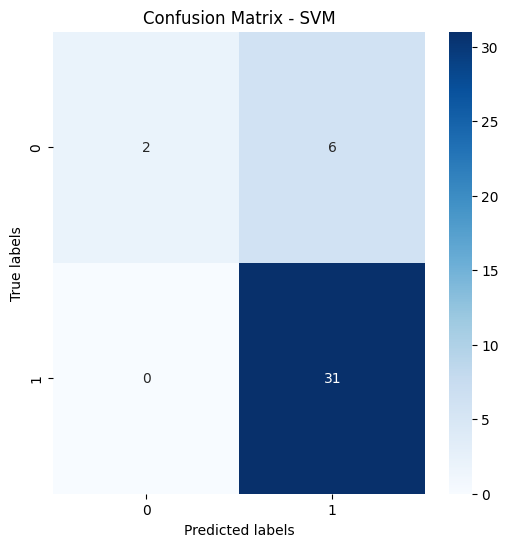

In [197]:
svm_conf_matrix = confusion_matrix(Y_test, Y_pred_svm)
plt.figure(figsize=(6, 6))
sns.heatmap(svm_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - SVM')
plt.show()

In [198]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [199]:
Y_pred_knn = knn_model.predict(X_test)

In [200]:
knn_recall = recall_score(Y_test, Y_pred_knn)
knn_precision = precision_score(Y_test, Y_pred_knn)
knn_f2_score = fbeta_score(Y_test, Y_pred_knn, beta=2)
knn_accuracy = accuracy_score(Y_test, Y_pred_knn)

In [201]:
print("K-Nearest Neighbors Metrics:")
print(f"Recall: {knn_recall}")
print(f"Precision: {knn_precision}")
print(f"F2 Score: {knn_f2_score}")
print(f"Accuracy: {knn_accuracy}")

K-Nearest Neighbors Metrics:
Recall: 0.7741935483870968
Precision: 0.8888888888888888
F2 Score: 0.794701986754967
Accuracy: 0.7435897435897436


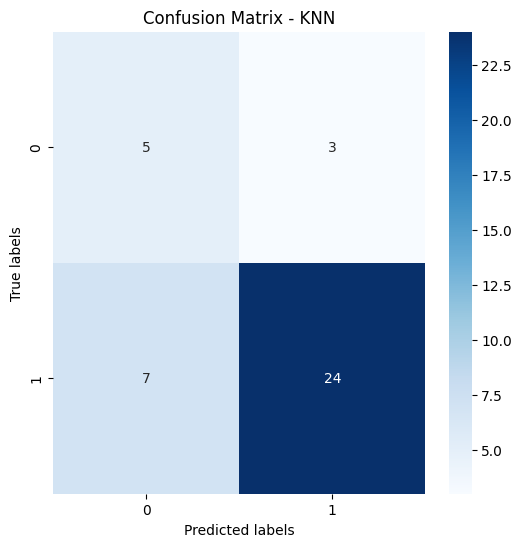

In [202]:
knn_conf_matrix = confusion_matrix(Y_test, Y_pred_knn)
plt.figure(figsize=(6, 6))
sns.heatmap(knn_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - KNN')
plt.show()

In [203]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

GaussianNB()

In [204]:
Y_pred_nb = nb_model.predict(X_test)

In [205]:
nb_recall = recall_score(Y_test, Y_pred_nb)
nb_precision = precision_score(Y_test, Y_pred_nb)
nb_f2_score = fbeta_score(Y_test, Y_pred_nb, beta=2)
nb_accuracy = accuracy_score(Y_test, Y_pred_nb)

In [206]:
print("Naive Bayes Metrics:")
print(f"Recall: {nb_recall}")
print(f"Precision: {nb_precision}")
print(f"F2 Score: {nb_f2_score}")
print(f"Accuracy: {nb_accuracy}")

Naive Bayes Metrics:
Recall: 0.4838709677419355
Precision: 1.0
F2 Score: 0.539568345323741
Accuracy: 0.5897435897435898


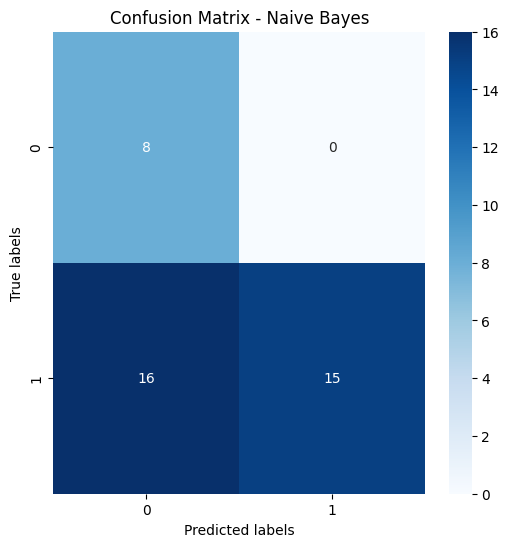

In [207]:
nb_conf_matrix = confusion_matrix(Y_test, Y_pred_nb)
plt.figure(figsize=(6, 6))
sns.heatmap(nb_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

In [208]:
et_model = ExtraTreesClassifier()
et_model.fit(X_train, Y_train)

ExtraTreesClassifier()

In [209]:
Y_pred_et = et_model.predict(X_test)

In [210]:
t_recall = recall_score(Y_test, Y_pred_et)
et_precision = precision_score(Y_test, Y_pred_et)
et_f2_score = fbeta_score(Y_test, Y_pred_et, beta=2)
et_accuracy = accuracy_score(Y_test, Y_pred_et)

In [211]:
print("Extra Trees Metrics:")
print(f"Recall: {et_recall}")
print(f"Precision: {et_precision}")
print(f"F2 Score: {et_f2_score}")
print(f"Accuracy: {et_accuracy}")

Extra Trees Metrics:
Recall: 0.9354838709677419
Precision: 0.9642857142857143
F2 Score: 0.888157894736842
Accuracy: 0.8717948717948718


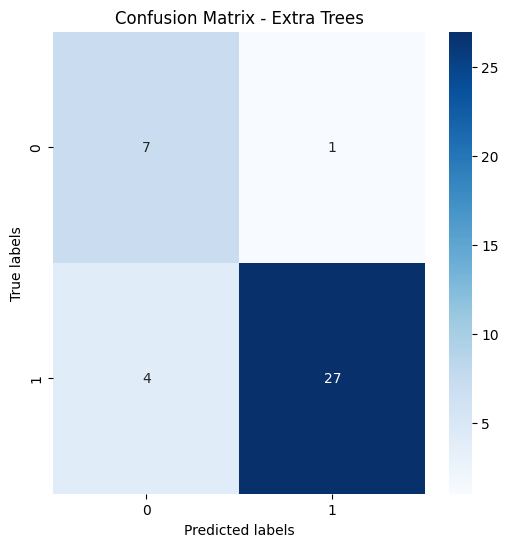

In [212]:
et_conf_matrix = confusion_matrix(Y_test, Y_pred_et)
plt.figure(figsize=(6, 6))
sns.heatmap(et_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Extra Trees')
plt.show()

In [213]:
input_data = (197.07600, 206.89600, 192.05500, 0.00289, 0.00001, 0.00166, 0.00168, 0.00498, 0.01098, 0.09700, 0.00563, 0.00680, 0.00802, 0.01689, 0.00339, 26.77500, 0.422229, 0.741367, -7.348300, 0.177551, 1.743867, 0.085569)


In [214]:
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

In [215]:
models_metrics = {
    'Logistic Regression': lr_accuracy,
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy,
    'Gradient Boosting': gb_accuracy,
    'SVM': svm_accuracy,
    'KNN': knn_accuracy,
    'Naive Bayes': nb_accuracy,
    'Extra Trees': et_accuracy
}

In [216]:
best_model = max(models_metrics, key=models_metrics.get)

In [217]:
print(f"Best model based on accuracy: {best_model}")

Best model based on accuracy: Logistic Regression


In [218]:
if best_model == 'Logistic Regression':
    best_model = lr_model
elif best_model == 'Decision Tree':
    best_model = dt_model
elif best_model == 'Random Forest':
    best_model = rf_model
elif best_model == 'Gradient Boosting':
    best_model = gb_model
elif best_model == 'SVM':
    best_model = svm_model
elif best_model == 'KNN':
    best_model = knn_model
elif best_model == 'Naive Bayes':
    best_model = nb_model
elif best_model == 'Extra Trees':
    best_model = et_model

In [219]:
prediction = best_model.predict(input_data_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [220]:
if prediction[0] == 0:
    print("The Person does not have Parkinson's Disease")
else:
    print("The Person has Parkinson's Disease")

The Person does not have Parkinson's Disease


In [223]:
filename = 'parkinsons_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

<ipython-input-222-2d1ef5fe8032>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


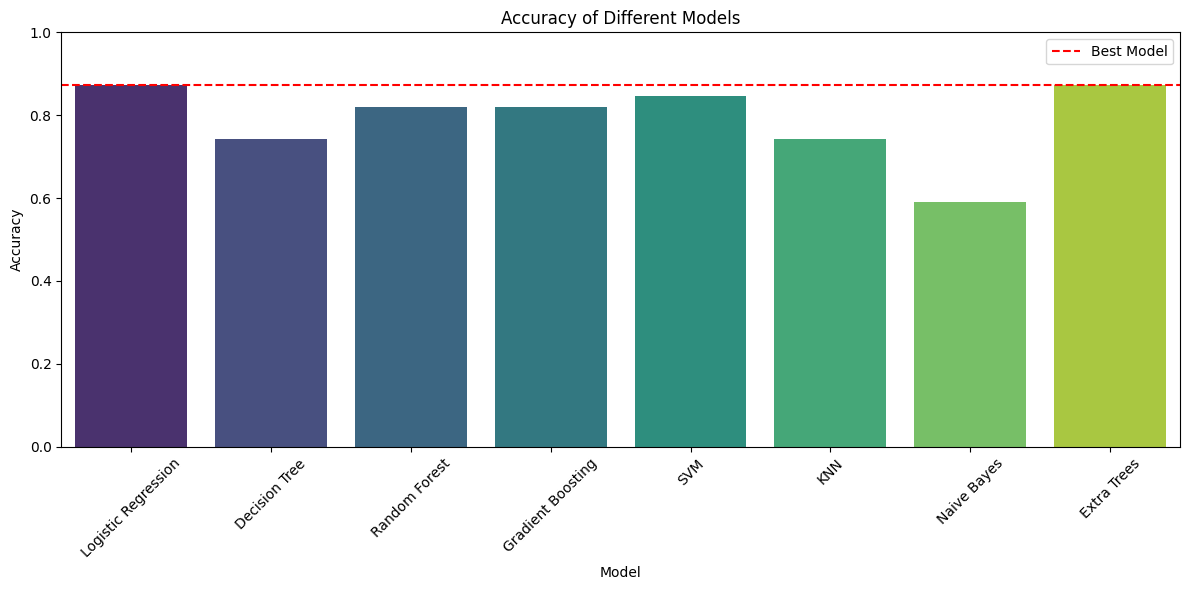

In [222]:
models = list(models_metrics.keys())
accuracies = list(models_metrics.values())

plt.figure(figsize=(12, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.axhline(max(accuracies), color='r', linestyle='--', label='Best Model')
plt.legend()
plt.tight_layout()
plt.show()
